## IMDC_IM00

In [2]:
# 1. We will use serial connection here to communicate with the system.
# 2. We will use pyvisa connection here to communicate with the power meter using USB

#Installation:

# pip install -U pyvisa-py 
# pip install pyusb
# python -m pip install pyserial



In [1]:
import serial
import pandas as pd
import numpy as np
import time
import math
import pyvisa
from matplotlib import pyplot as plt
import xlsxwriter


# Serial connection to communicate with the system, baudrate = 15200 and port = 'COM5' we have set it externally and should be
# provided from the authority. 

ser = serial.Serial()
ser.baudrate = 115200
ser.port = 'COM5'
ser.timeout=10
ser.open()

In [2]:
import serial
import pandas as pd
import numpy as np
import time
import math
import pyvisa
from matplotlib import pyplot as plt
import xlsxwriter

# Power meter connection (power meter we are accessins using USB address)
rm = pyvisa.ResourceManager()
power_meter = rm.open_resource('USB0::0x1FDE::0x0005::82204124::INSTR') #This usb address has been provided by the authority, if you use different USB connection this address will change accordingly

# Open a connection to the power meter
print(power_meter.query('*IDN?')) # This query will reveal the name of the instrument you are going to access

ILX Lightwave,8220,82204124,1.17



ILX Lightwave,8220,82204124,1.17

True
Enter the step size0.3
The value of IM: 0.1
The value of IM: 0.4
The value of IM: 0.7
The value of IM: 1.0
The value of IM: 1.3
The value of IM: 1.6
The value of IM: 1.9000000000000001
The value of IM: 2.2


C:\Users\qnu\AppData\Local\Temp\ipykernel_3624\3691681689.py:123: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


-5.370000000000001


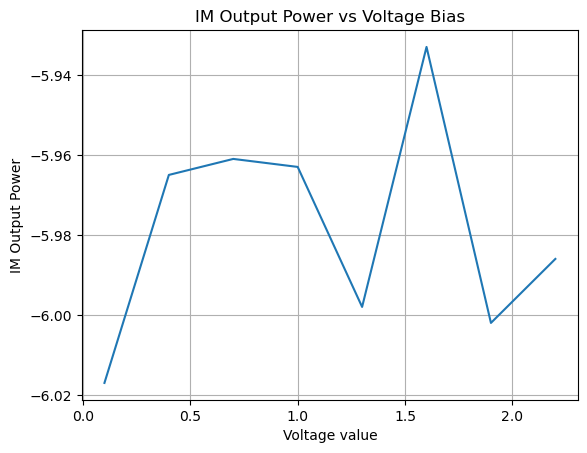

In [3]:
import serial
import pandas as pd
import numpy as np
import time
import math
import pyvisa
from matplotlib import pyplot as plt
import xlsxwriter

# Power meter connection (power meter we are accessins using USB address)
rm = pyvisa.ResourceManager()
power_meter = rm.open_resource('USB0::0x1FDE::0x0005::82204124::INSTR')
# Open a connection to the power meter
print(power_meter.query('*IDN?'))

# Serial connection (This COM port details for system access, QKD Sitara)
ser = serial.Serial()
ser.baudrate = 115200
ser.port = 'COM5'
ser.timeout=10
ser.open()

def setting():
    print(f"The value of IM: {number}")
    ser.write(b"diagonise aem set AAM_SUBSYS/IM00_SPI_AXI\r")
    new_num=str(number)+"\r"
    ser.write(new_num.encode())
    t_end1 = time.time() + 10
    while time.time() < t_end1:
         # Wait until there is data waiting in the serial buffer
        if ser.in_waiting > 0:

             # Read data out of the buffer until a carraige return / new line is found
            serialString = ser.readline()
             # Print the contents of the serial data
            try:
                print(serialString.decode("Ascii"))
            except:
                 pass
                
serialString=""
print(ser.is_open)

# log_in credential, This credential is provided by the authority
ser.write(b"telnet localhost 8000\r")
ser.write(b"admin\r")
ser.write(b"qunu123\r")

########################################################
# Creating the list of voltage values according to the input
step_size = float(input("Enter the step size"))
voltage_value = []
voltage = 0.1
while voltage < 2.5:
    voltage_value.append(voltage)
    voltage = voltage + step_size

power = []
for i in voltage_value:
    number = i
    setting()
    power_meter.write('POWer?') # For more information about these command, go to the documentation of the instrument
    response = power_meter.read()
    power.append(response)

# Post-processing
power_values = []
for item in power:
    try:
        power_value = float(item)
        power_values.append(power_value)
    except ValueError:
        pass

# Create the plot
plt.plot(voltage_value, power_values)
plt.xlabel('Voltage value')
plt.ylabel('IM Output Power')
plt.title('IM Output Power vs Voltage Bias')
plt.grid(True)   
 
 # Save the plot as an image file
plt.savefig('im_output_power_plot.png')

# Create a DataFrame with the voltage and power data
voltage = {'Voltage Bias': voltage_value, 'IM Output Power': power_values}
df = pd.DataFrame(voltage)

# Create an Excel writer
writer = pd.ExcelWriter('Int_Modulator_new.xlsx', engine='xlsxwriter')

# Write the DataFrame to the Excel sheet
df.to_excel(writer, sheet_name='Sheet1', index=False)

# Add the plot image to the Excel sheet
workbook = writer.book
worksheet = writer.sheets['Sheet1']
worksheet.insert_image('E1', 'im_output_power_plot.png')
worksheet.set_column('A:A', 20)
worksheet.set_column('B:B', 20)
worksheet.set_column('C:C', 20)
worksheet.set_column('D:D', 20)
cell_format = workbook.add_format({'bold': True, 'text_wrap': True})
worksheet.write('C3', 'The minimum power value (in dBm) is:', cell_format)
worksheet.write('D3', min(power_values))
worksheet.write('C4', 'Corresponding voltage value is:', cell_format)
worksheet.write('D4', voltage_value[(power_values.index(min(power_values)))])
worksheet.write('C5', 'The maximum power value (in dBm) is:', cell_format)
worksheet.write('D5', max(power_values))
worksheet.write('C6', 'Corresponding voltage value is:', cell_format)
worksheet.write('D6', voltage_value[(power_values.index(max(power_values)))])

# Calculating the reference voltage for IMDC_IM01
min_voltage = voltage_value[(power_values.index(min(power_values)))]
max_voltage = voltage_value[(power_values.index(max(power_values)))]
ref_voltage = min_voltage * 3.58 - max_voltage * 3.58
worksheet.write('C7', 'The reference voltage for IMDC_IM01 is:', cell_format)
worksheet.write('D7', ref_voltage)

writer.save()    

print(ref_voltage)



In [2]:
ref_voltage = 4.58

## IMDC_IM01


In [11]:
# After getting the reference voltage from IMDC_IM00, we are going to set the the value for IMDC_IM01, again like before
# we will make serial connection with the system

import serial
import pandas as pd
import numpy as np
import time
j=0
ser = serial.Serial()
ser.baudrate = 115200
ser.port = 'COM6'
ser.timeout=10
ser.open()
if ser.is_open:
    print("Serial connection opened successfully.")
else:
    print("Failed to open serial connection.")
    
ser.write(b"telnet localhost 8000\r")
ser.write(b"admin\r")
ser.write(b"*****\r")

Serial connection opened successfully.


8

In [2]:
import pyvisa
# Set up the VISA connection with CRO
rm = pyvisa.ResourceManager()
resource_name = 'TCPIP::192.168.10.183::INSTR'  # Replace with your CRO's IP address, if you use different CRO, should be provided by the authority
scope = rm.open_resource(resource_name)
print(f"Connected to {resource_name}")

VisaIOError: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.

In [13]:
import serial
import pandas as pd
import numpy as np
import time
import math
import pyvisa
from matplotlib import pyplot as plt
import xlsxwriter

# Serial connection
ser = serial.Serial()
ser.baudrate = 115200
ser.port = 'COM6'
ser.timeout=10
ser.open()

def setting():
    #print(f"The value of IM: {number}")
    ser.write(b"diagonise aem set AAM_SUBSYS/IM01_SPI_AXI\r")
    new_num=str(number)+"\r"
    ser.write(new_num.encode())
    t_end1 = time.time() + 10
    while time.time() < t_end1:
         # Wait until there is data waiting in the serial buffer
        if ser.in_waiting > 0:

             # Read data out of the buffer until a carraige return / new line is found
            serialString = ser.readline()
             # Print the contents of the serial data
            try:
                print(serialString.decode("Ascii"))
            except:
                 pass
                
serialString=""
print(ser.is_open)

# log_in credential
ser.write(b"telnet localhost 8000\r")
ser.write(b"admin\r")
ser.write(b"****\r")

########################################################
# Creating the list of voltage values
step_size = float(input("Enter the step size"))
voltage_value = []
voltage = 0.1
while voltage < 2.5:
    voltage_value.append(voltage)
    voltage = voltage + step_size
###################################################################
# Set up the VISA connection with CRO
rm = pyvisa.ResourceManager()
resource_name = 'TCPIP::192.168.10.183::INSTR'  # Replace with your CRO's IP address
scope = rm.open_resource(resource_name)
print(f"Connected to {resource_name}")
########################################################################
# Data Acquisition
pktopk = []
minimum = []
for i in voltage_value:
    number = i
    setting()
    #peak to peak voltage measurement
    scope.write('MEASUrement:IMMed:SOUrce1 CH2')
    scope.write('MEASUrement:IMMed:TYPe PK2Pk')
    pktopk_value = scope.query('MEASUrement:IMMed:VALue?')
    pktopk.append(float(pktopk_value))
    #minimum value measurement
    scope.write('MEASUrement:IMMed:SOUrce1 CH2')
    scope.write('MEASUrement:IMMed:TYPe MINImum')
    minimum_value = scope.query('MEASUrement:IMMed:VALue?')
    minimum.append(float(minimum_value))

# Creating the excel sheet
# Create a DataFrame with the peak to peak voltage and minimum voltage
data = {'Voltage': voltage_value,'Peak to peak (in volt)': pktopk, 'Minimum Voltage (in volt)': minimum}
df = pd.DataFrame(data)

# Create an Excel writer
writer = pd.ExcelWriter('IMDC_IM01.xlsx', engine='xlsxwriter')

# Write the DataFrame to the Excel sheet
df.to_excel(writer, sheet_name='Sheet1', index=False)

# Add the plot image to the Excel sheet
workbook = writer.book
worksheet = writer.sheets['Sheet1']
worksheet.set_column('A:A', 20)
worksheet.set_column('B:B', 20)
worksheet.set_column('C:C', 20)
worksheet.set_column('D:D', 20)
cell_format = workbook.add_format({'bold': True, 'text_wrap': True})

# Calculating the Voltage corresponding to the ref voltage from IMDC_IM00
print(f"The reference voltage is {ref_voltage}")
reference_voltage = ref_voltage
closest_voltage = min(pktopk, key=lambda x: abs(x - reference_voltage))
closest_index = pktopk.index(closest_voltage)
IMDC_IM01_value = voltage_value[closest_index]
print("Closest Peak-to-Peak Voltage:", closest_voltage)
print("Corresponding Voltage Value:", IMDC_IM01_value)

cell_format = workbook.add_format({'bold': True, 'text_wrap': True})
worksheet.write('D3', 'The value for IMDC_IM01 is:', cell_format)
worksheet.write('E3', IMDC_IM01_value)

writer.save()    

# The correnponding voltage for IMDC_IM01 is the voltage for which the peak to peak voltage measured by CRO is equal (ideally) or closest (practically)
# to the ref voltage from IMDC_IM00

True
Enter the step size0.1
Connected to TCPIP::192.168.10.183::INSTR
telnet localhost 8000

Invalid command "telnet"



qunu> admin

Invalid command "admin"



qunu> qunu123

Invalid command "qunu123"



qunu> diagonise aem set AAM_SUBSYS/IM01_SPI_AXI

Enter the float value for AAM_SUBSYS/IM01_SPI_AXI : 0.1

successfully set the register : AAM_SUBSYS/IM01_SPI_AXI



qunu> 
diagonise aem set AAM_SUBSYS/IM01_SPI_AXI

Enter the float value for AAM_SUBSYS/IM01_SPI_AXI : 0.2

successfully set the register : AAM_SUBSYS/IM01_SPI_AXI



qunu> 
diagonise aem set AAM_SUBSYS/IM01_SPI_AXI

Enter the float value for AAM_SUBSYS/IM01_SPI_AXI : 0.30000000000000004

successfully set the register : AAM_SUBSYS/IM01_SPI_AXI



qunu> 
diagonise aem set AAM_SUBSYS/IM01_SPI_AXI

Enter the float value for AAM_SUBSYS/IM01_SPI_AXI : 0.4

successfully set the register : AAM_SUBSYS/IM01_SPI_AXI



qunu> 
diagonise aem set AAM_SUBSYS/IM01_SPI_AXI

Enter the float value for AAM_SUBSYS/IM01_SPI_AXI : 0.5

successfu

C:\Users\qnu\AppData\Local\Temp\ipykernel_5716\246914447.py:108: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


## IMDC_IM10

In [14]:
ref_voltage = 0.1 * 3.58

In [15]:
import serial
import pandas as pd
import numpy as np
import time
import math
import pyvisa
from matplotlib import pyplot as plt
import xlsxwriter

# Serial connection
ser = serial.Serial()
ser.baudrate = 115200
ser.port = 'COM6'
ser.timeout=10
ser.open()

def setting():
    #print(f"The value of IM: {number}")
    ser.write(b"diagonise aem set AAM_SUBSYS/IM10_SPI_AXI\r")
    new_num=str(number)+"\r"
    ser.write(new_num.encode())
    t_end1 = time.time() + 10
    while time.time() < t_end1:
         # Wait until there is data waiting in the serial buffer
        if ser.in_waiting > 0:

             # Read data out of the buffer until a carraige return / new line is found
            serialString = ser.readline()
             # Print the contents of the serial data
            try:
                print(serialString.decode("Ascii"))
            except:
                 pass
                
serialString=""
print(ser.is_open)

# log_in credential
ser.write(b"telnet localhost 8000\r")
ser.write(b"admin\r")
ser.write(b"****\r")

########################################################
# Creating the list of voltage values
step_size = float(input("Enter the step size"))
voltage_value = []
voltage = 0.1
while voltage < 2.5:
    voltage_value.append(voltage)
    voltage = voltage + step_size
###################################################################
# Set up the VISA connection with CRO
rm = pyvisa.ResourceManager()
resource_name = 'TCPIP::192.168.10.183::INSTR'  # Replace with your CRO's IP address
scope = rm.open_resource(resource_name)
print(f"Connected to {resource_name}")
########################################################################
# Data Acquisition
IM10_minimum = []
for i in voltage_value:
    number = i
    setting()
    #minimum value measurement
    scope.write('MEASUrement:IMMed:SOUrce1 CH2')
    scope.write('MEASUrement:IMMed:TYPe MINImum')
    IM10_minimum_value = scope.query('MEASUrement:IMMed:VALue?')
    IM10_minimum.append(float(IM10_minimum_value))

# Creating the excel sheet
# Create a DataFrame with the peak to peak voltage and minimum voltage
data = {'Voltage': voltage_value,'Minimum Voltage (in volt)': IM10_minimum}
df = pd.DataFrame(data)

# Create an Excel writer
writer = pd.ExcelWriter('IMDC_IM10.xlsx', engine='xlsxwriter')

# Write the DataFrame to the Excel sheet
df.to_excel(writer, sheet_name='Sheet1', index=False)

# Add the plot image to the Excel sheet
workbook = writer.book
worksheet = writer.sheets['Sheet1']
worksheet.set_column('A:A', 20)
worksheet.set_column('B:B', 20)
worksheet.set_column('C:C', 20)
worksheet.set_column('D:D', 20)
cell_format = workbook.add_format({'bold': True, 'text_wrap': True})

# Calculating the Voltage corresponding to the ref voltage from IMDC_IM00
print(f"The reference voltage is {ref_voltage}")
reference_voltage = ref_voltage
closest_voltage = min(IM10_minimum, key=lambda x: abs(x - reference_voltage))
closest_index = IM10_minimum.index(closest_voltage)
IMDC_IM10_value = voltage_value[closest_index]
print("Closest minimum Voltage:", closest_voltage)
print("Corresponding Voltage Value:", IMDC_IM10_value)

cell_format = workbook.add_format({'bold': True, 'text_wrap': True})
worksheet.write('C3', 'The value for IMDC_IM10 is:', cell_format)
worksheet.write('D3', IMDC_IM10_value)

writer.save()    
  

# The correnponding voltage for IMDC_IM10 is the voltage for which the minimum voltage measured by CRO is equal (ideally) or closest (practically)
# to the ref voltage multiplied by a factor (for example here 3.58, provided by the authority) from IMDC_IM00

True
Enter the step size0.1
Connected to TCPIP::192.168.10.183::INSTR
telnet localhost 8000

Invalid command "telnet"



qunu> admin

Invalid command "admin"



qunu> qunu123

Invalid command "qunu123"



qunu> diagonise aem set AAM_SUBSYS/IM10_SPI_AXI

Enter the float value for AAM_SUBSYS/IM10_SPI_AXI : 0.1

successfully set the register : AAM_SUBSYS/IM10_SPI_AXI



qunu> 
diagonise aem set AAM_SUBSYS/IM10_SPI_AXI

Enter the float value for AAM_SUBSYS/IM10_SPI_AXI : 0.2

successfully set the register : AAM_SUBSYS/IM10_SPI_AXI



qunu> 
diagonise aem set AAM_SUBSYS/IM10_SPI_AXI

Enter the float value for AAM_SUBSYS/IM10_SPI_AXI : 0.30000000000000004

successfully set the register : AAM_SUBSYS/IM10_SPI_AXI



qunu> 
diagonise aem set AAM_SUBSYS/IM10_SPI_AXI

Enter the float value for AAM_SUBSYS/IM10_SPI_AXI : 0.4

successfully set the register : AAM_SUBSYS/IM10_SPI_AXI



qunu> 
diagonise aem set AAM_SUBSYS/IM10_SPI_AXI

Enter the float value for AAM_SUBSYS/IM10_SPI_AXI : 0.5

successfu

C:\Users\qnu\AppData\Local\Temp\ipykernel_5716\4057979518.py:102: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
